Note: Some code chunks are the adapted ones. Credits to original author.

### International Airline Passengers prediction with ARIMA model

Please install pmdarima first: 

pip install pmdarima

In [2]:
# load packages
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read dataset
df = pd.read_csv('..\..\datasets\AirPassengers.csv')

df.head(10) # univariate time series

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
df.shape

(144, 2)

In [4]:
# checking start and end dates of the dataset
raw_datetime =  pd.to_datetime(df['Month'], infer_datetime_format=True)
raw_datetime.min(), raw_datetime.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

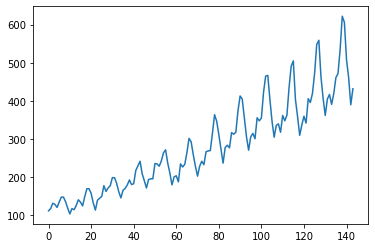

In [5]:
plt.plot(df['#Passengers'])

In [6]:
# converting the Month variable to datetime datatype
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [7]:
# set the index on Month variable
df.set_index('Month', inplace=True) 

df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


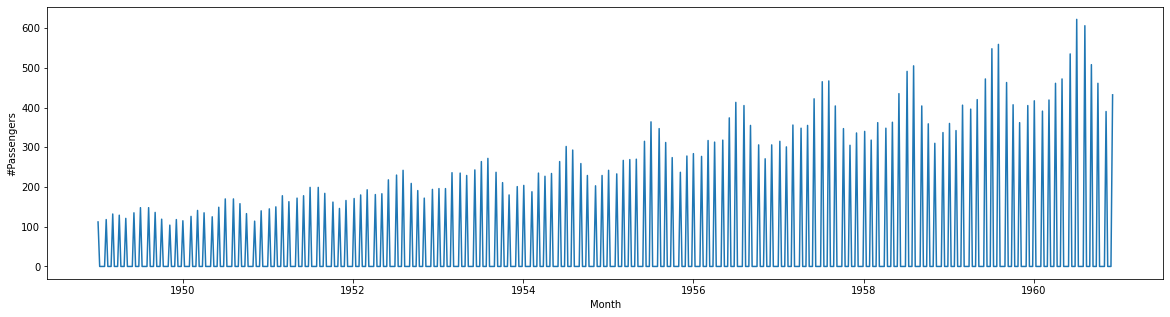

In [8]:
df_by_week = df.resample('W').sum()
fig,(ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20, 5)
sns.lineplot(x = df_by_week.index, y= "#Passengers", data = df_by_week, ax = ax1);

In [10]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [11]:
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


<AxesSubplot:xlabel='month', ylabel='#Passengers'>

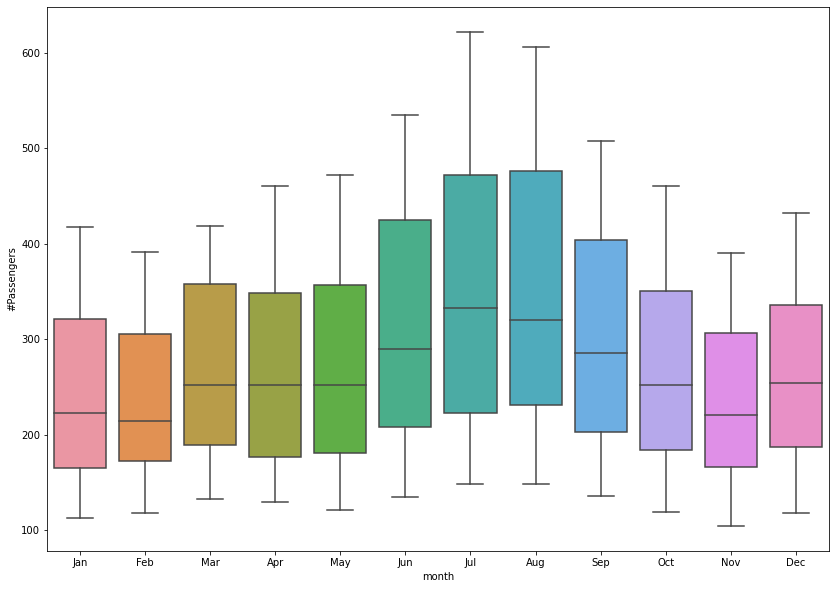

In [15]:
plt.figure(figsize=(14,10))

#Plot yearly and monthly values as boxplot
sns.boxplot(x='month', y='#Passengers', data=df)